In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Dataset

The dataset contains information on loans from 2016. 

The data is available from LendingClub. 2007-2010 data has been cleared of all NA values.
Source: https://www.kaggle.com/sarahvch/predicting-who-pays-back-loans#loan_data.csv


# Goal:

The goal will be to predict when a loan will be defaulted on, signified by a '1' in the 'not.fully.paid' column.

To achieve this, we will be using logistic regressions, decision trees, and random forests from SKlearn. 

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
#The 'purpose' and 'pub.rec' columns are qualitative. Therefore, we must separate the categories into separate
#columns, each with its own dummy variable.
purpose_ = pd.get_dummies(df['purpose'],drop_first=True)
public_record  = pd.get_dummies(df['pub.rec'],drop_first=True)

#Then, we drop the old columns and concatenate the new dataframs
df.drop(['purpose','pub.rec'],axis=1,inplace=True)
df = pd.concat([df,purpose_,public_record],axis=1)
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,debt_consolidation,educational,home_improvement,major_purchase,small_business,1,2,3,4,5
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,...,1,0,0,0,0,0,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,...,1,0,0,0,0,0,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#The same train and test data will be used for all three strategies
X_train, X_test, y_train, y_test = train_test_split(df.drop('not.fully.paid',axis=1), 
                                                    df['not.fully.paid'], test_size=0.20)

# Logistic Regression

In [6]:
#Train and predict
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

#Results
logistic_confusion_matrix = confusion_matrix(y_test,predictions)
logistic_classification_report = classification_report(y_test,predictions)

#ROC Curve set-up
lr_probs = logmodel.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

/Users/sambaker/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree

In [7]:
#Train and predict
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

#Results
decision_tree_confusion_matrix = confusion_matrix(y_test,predictions)
decision_tree_classification_report = (classification_report(y_test,predictions))

#ROC Curve set-up
dt_probs = dtree.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
dt_probs = dt_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# Random Forest

In [8]:
#Train and predict
rfc = RandomForestClassifier(n_estimators=3000)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

#Results
random_forests_confusion_matrix = confusion_matrix(y_test,predictions)
random_forests_classification_report = classification_report(y_test,predictions)

#ROC Curve set-up
rf_probs = rfc.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
rf_probs = rf_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Results

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [9]:
print('Logistic Regression:')
print(logistic_confusion_matrix) 
print(logistic_classification_report)


print('Decision Tree:')
print(decision_tree_confusion_matrix) 
print(decision_tree_classification_report)


print('Random Forest:')
print(random_forests_confusion_matrix) 
print(random_forests_classification_report)

Logistic Regression:
[[1638    1]
 [ 272    5]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1639
           1       0.83      0.02      0.04       277

    accuracy                           0.86      1916
   macro avg       0.85      0.51      0.48      1916
weighted avg       0.85      0.86      0.79      1916

Decision Tree:
[[1369  270]
 [ 207   70]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1639
           1       0.21      0.25      0.23       277

    accuracy                           0.75      1916
   macro avg       0.54      0.54      0.54      1916
weighted avg       0.77      0.75      0.76      1916

Random Forest:
[[1633    6]
 [ 271    6]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1639
           1       0.50      0.02      0.04       277

    accuracy                           0.86      1

Interpretation: out of the three strategies, the random forest and logit performed the best. However, based on the confusion matrices, it is clear that both strategies probably predicted all outcomes to be fully paid back. In other words, these strategies were ineffective at predicting defaults

Text(0.5, 1.0, 'Random Forest - ROC AUC=0.660')

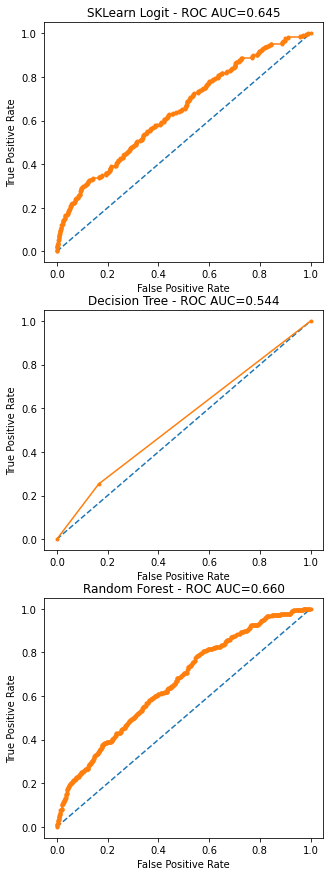

In [10]:
fig, axs = plt.subplots(3,figsize=(5,15))

axs[0].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
axs[1].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
axs[2].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

axs[0].plot(lr_fpr, lr_tpr, marker='.', label='SKLearn Logit')
axs[1].plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
axs[2].plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

for ax in axs.flat:
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

axs[0].set_title('SKLearn Logit - ROC AUC=%.3f' % (lr_auc))
axs[1].set_title('Decision Tree - ROC AUC=%.3f' % (dt_auc))
axs[2].set_title('Random Forest - ROC AUC=%.3f' % (rf_auc))

# A Balanced Approach

In [11]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

As seen above, only 1/6 loans were defaults. This imbalance in our dependent variable creates ineffective predictions. We will now attempt to 'balance' the data by resampling the default instances.

In [12]:
from sklearn.utils import resample

In [13]:
df_majority = df[df['not.fully.paid']==0]
df_minority = df[df['not.fully.paid']==1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=8045,    # to match majority class
                                 random_state=123) # reproducible results

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled['not.fully.paid'].value_counts()

0    8045
1    8045
Name: not.fully.paid, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop('not.fully.paid',axis=1), 
                                                    df_upsampled['not.fully.paid'], test_size=0.20)

Now having balanced data, we will re-run the three strategies.

# Logistic Regression

In [15]:
#Train and predict
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

#Results
logistic_confusion_matrix = confusion_matrix(y_test,predictions)
logistic_classification_report = classification_report(y_test,predictions)

#ROC Curve set-up
lr_probs = logmodel.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Decision Tree

In [16]:
#Train and predict
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

#Results
decision_tree_confusion_matrix = confusion_matrix(y_test,predictions)
decision_tree_classification_report = (classification_report(y_test,predictions))

#ROC Curve set-up
dt_probs = dtree.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
dt_probs = dt_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# Random Forest

In [17]:
#Train and predict
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

#Results
random_forests_confusion_matrix = confusion_matrix(y_test,predictions)
random_forests_classification_report = classification_report(y_test,predictions)

#ROC Curve set-up
rf_probs = rfc.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
rf_probs = rf_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Results

In [18]:
print('Logistic Regression:')
print(logistic_confusion_matrix) 
print(logistic_classification_report)


print('Decision Tree:')
print(decision_tree_confusion_matrix) 
print(decision_tree_classification_report)


print('Random Forest:')
print(random_forests_confusion_matrix) 
print(random_forests_classification_report)

Logistic Regression:
[[928 666]
 [758 866]]
              precision    recall  f1-score   support

           0       0.55      0.58      0.57      1594
           1       0.57      0.53      0.55      1624

    accuracy                           0.56      3218
   macro avg       0.56      0.56      0.56      3218
weighted avg       0.56      0.56      0.56      3218

Decision Tree:
[[1283  311]
 [  20 1604]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.89      1594
           1       0.84      0.99      0.91      1624

    accuracy                           0.90      3218
   macro avg       0.91      0.90      0.90      3218
weighted avg       0.91      0.90      0.90      3218

Random Forest:
[[1543   51]
 [  21 1603]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1594
           1       0.97      0.99      0.98      1624

    accuracy                           0.98      3218


While all strategies improved at predicting defaults, we have a clear winner with the random forest strategy. 

Text(0.5, 1.0, 'Random Forest - ROC AUC=0.995')

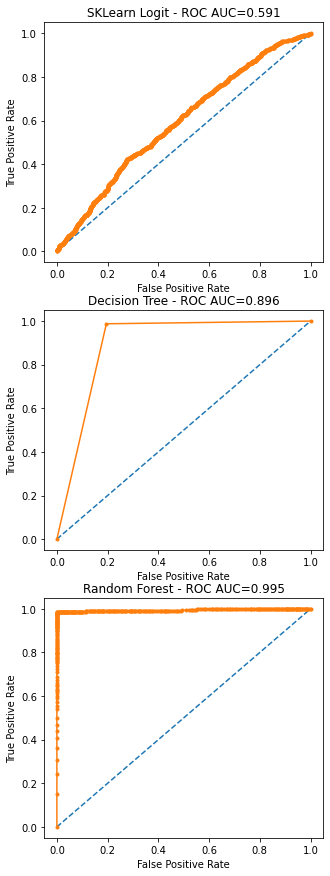

In [19]:
fig, axs = plt.subplots(3,figsize=(5,15))

axs[0].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
axs[1].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
axs[2].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

axs[0].plot(lr_fpr, lr_tpr, marker='.', label='SKLearn Logit')
axs[1].plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
axs[2].plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

for ax in axs.flat:
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

axs[0].set_title('SKLearn Logit - ROC AUC=%.3f' % (lr_auc))
axs[1].set_title('Decision Tree - ROC AUC=%.3f' % (dt_auc))
axs[2].set_title('Random Forest - ROC AUC=%.3f' % (rf_auc))

The ROC curve provides a visualization of how successful the Random Forest strategy is. Its precision of predicting defaults is 97%, while predicting non-defaults remained at 99%. This ML strategy remains a 'black box': we cannot know what relationships were detected. However, this study has shown how prodiving data in the right format can improve ML predictions, and how different strategies will show different performances.